# Hello its day 8 today we have twitter stock analysis

In [60]:
## import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import  statsmodels as sm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
import statsmodels.api as sm


In [2]:
##read_data
data=pd.read_csv("TWTR.csv",sep=',', index_col='Date', parse_dates=['Date'])

##top 5 column of data 
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-09,45.590000,49.840000,45.020000,49.139999,49.139999,17366614
2013-12-10,48.900002,52.580002,48.700001,51.990002,51.990002,25792002
2013-12-11,52.400002,53.869999,51.000000,52.340000,52.340000,26631535
2013-12-12,52.200001,55.869999,50.689999,55.330002,55.330002,23446870
2013-12-13,56.200001,59.410000,55.450001,59.000000,59.000000,38979567


In [3]:
##cheaking missing value 
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# vizualizeing the per day closeing price

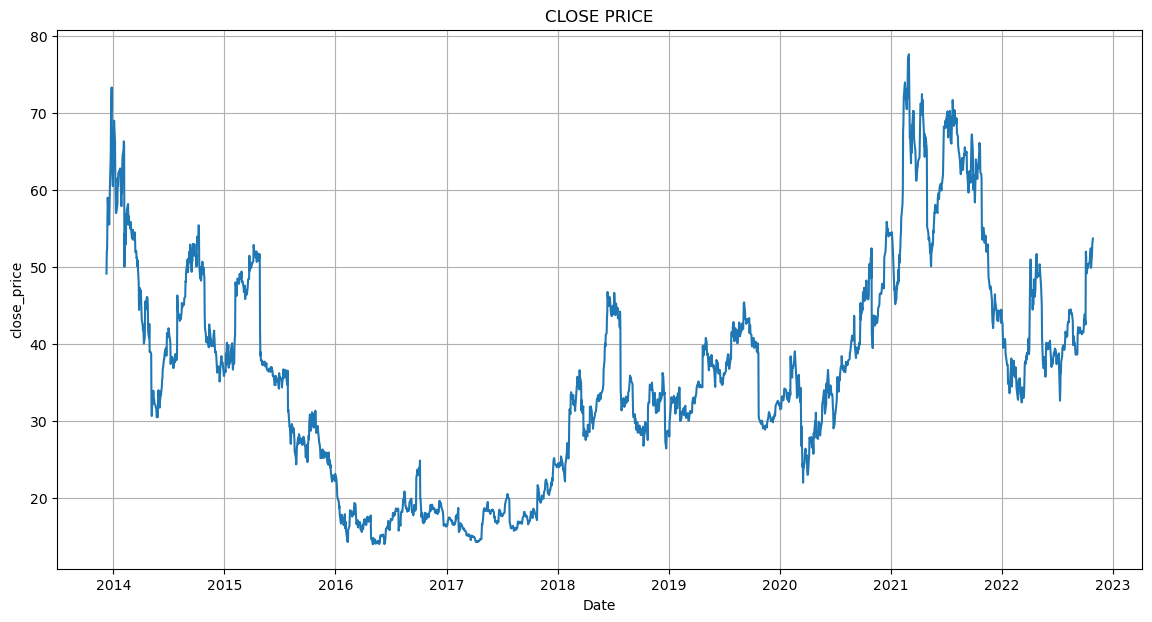

In [4]:


plt.figure(figsize=(14,7))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('close_price')
plt.plot(data['Close'])
plt.title('CLOSE PRICE')
plt.show()

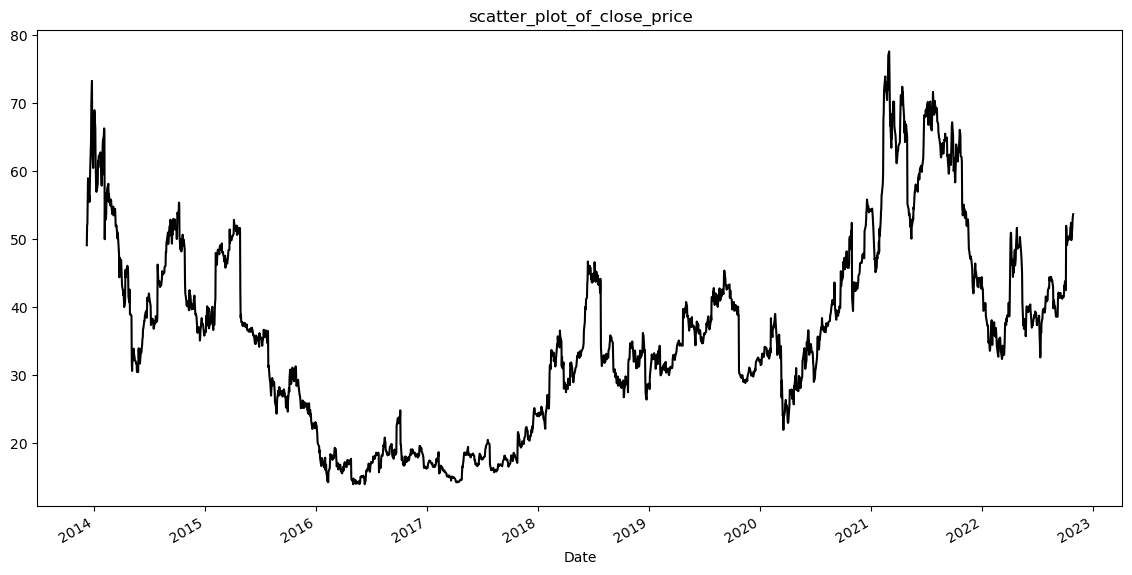

In [5]:
plt.figure(figsize=(14,7))
stock_close=data['Close']
stock_close.plot(style='k')
plt.title('scatter_plot_of_close_price')
plt.show()

# now we cheak if a series is stationary or not because time series analysis work only on stationary data

In [25]:
def test_stationary(time_seres):
  #determine rolling statistic 
  rol_mean=time_seres.rolling(12).mean()
  rol_std=time_seres.rolling(12).std()
  #ploting_roling_statistic
  plt.figure(figsize=(18,7))
  plt.plot(time_seres,color='blue',label='orignal')
  plt.plot(rol_mean,color='red',label='mean_')
  plt.plot(rol_std,color='black',label='std_')
  plt.legend(loc='best')
  plt.title('rolling mean and standard deviation')
  plt.show(block=False)

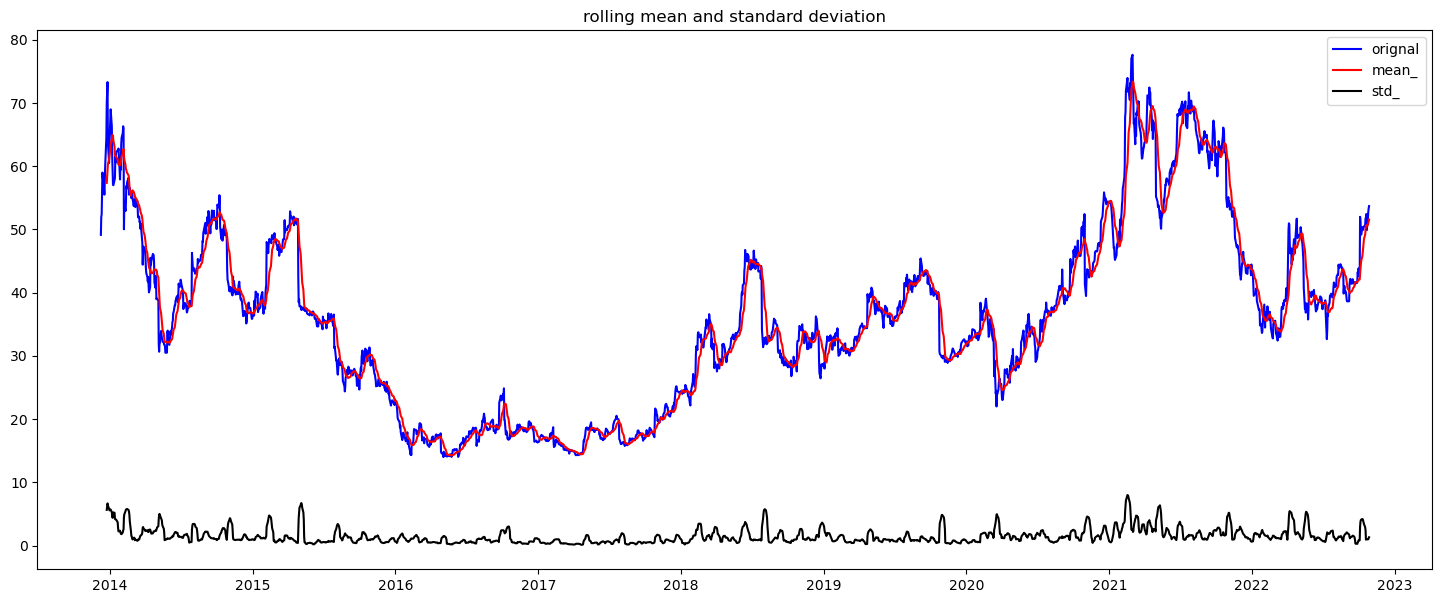

In [7]:
test_stationary(stock_close)


hence we see that in above graph increase mean and incresae standard deviation hence our data is non stationary now we need to seperate seasonality and trend from our seres the result seres become stationary through this processs so let seprate the trend and seasonality

<Figure size 640x480 with 0 Axes>

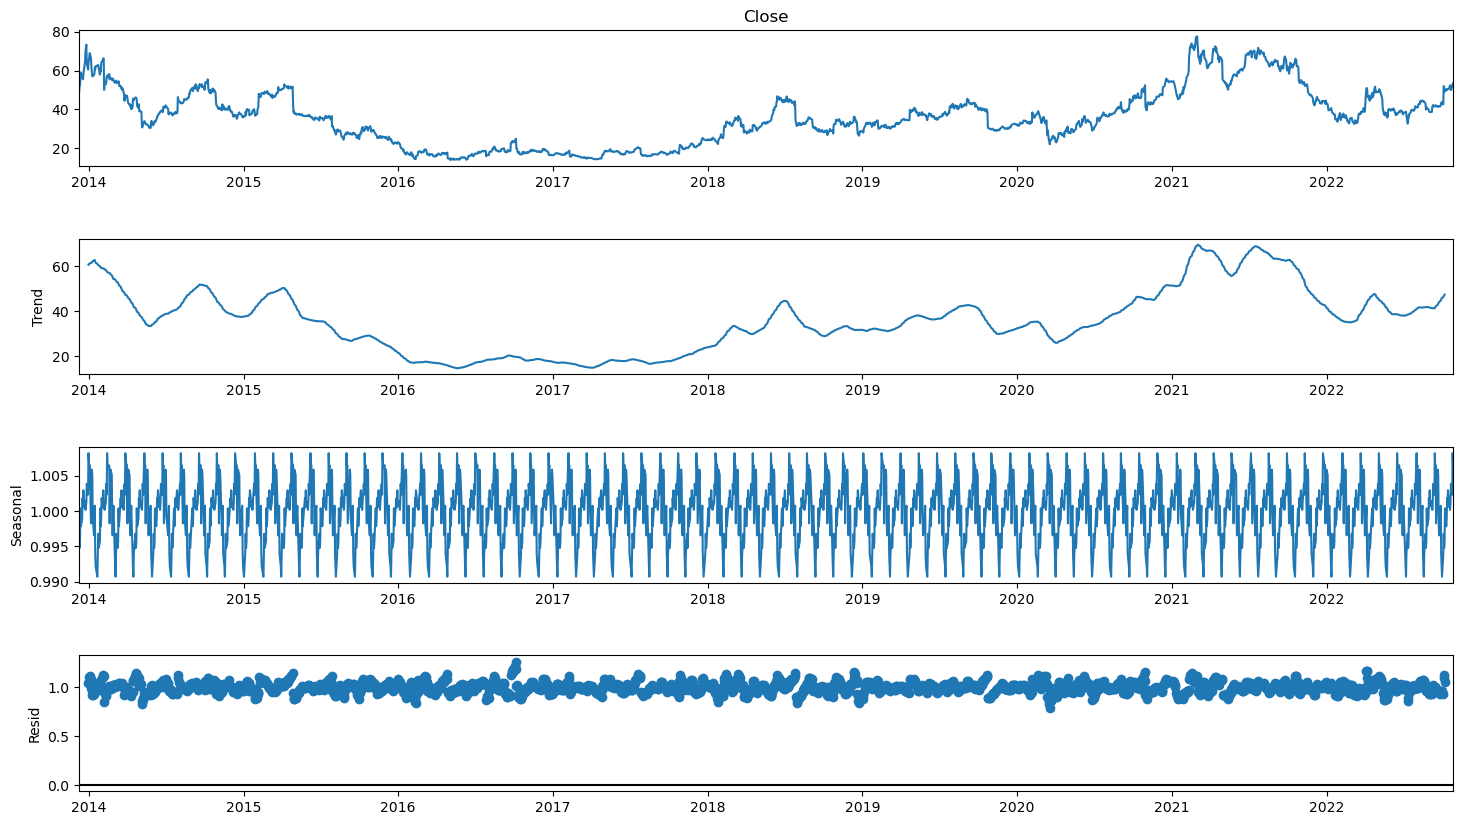

In [8]:
result=seasonal_decompose(stock_close,model='multiplicative',period=30)
fig=plt.figure()
fig=result.plot()
fig.set_size_inches(16, 9)


here we start seres by takeing a log of series to reduce the magnitude of value and reduce the riseing trend in series rolling average which is calculated by taking input for the past 12 month and given a mean consumption value at every pount

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


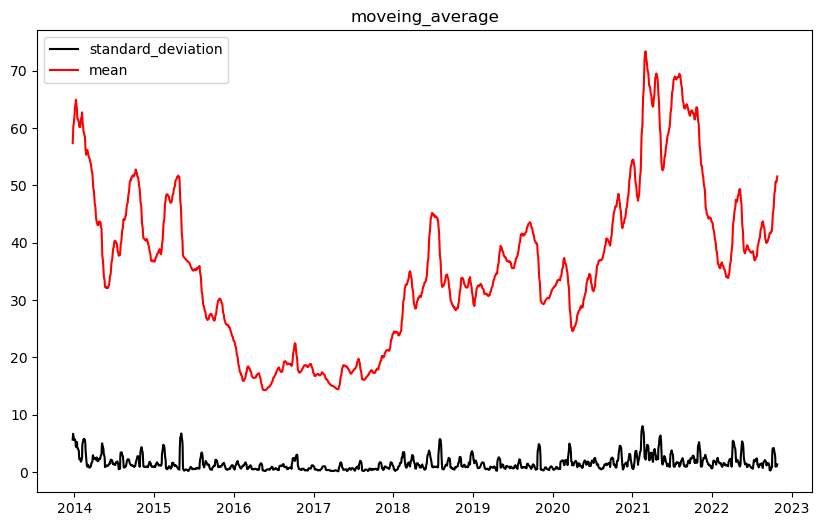

In [9]:
from pylab import rcParams
rcParams['figure.figsize']= 10,6
df_log=np.log(stock_close)
moveing_average=stock_close.rolling(12).mean()
std_dev=stock_close.rolling(12).std()
plt.legend()
plt.title('moveing_average')
plt.plot(std_dev,color='black',label='standard_deviation')
plt.plot(moveing_average,color='red',label="mean")
plt.legend()
plt.show()

now we are going to create arima model and train with the closeing price of stocks so let split our data into training and testing phase

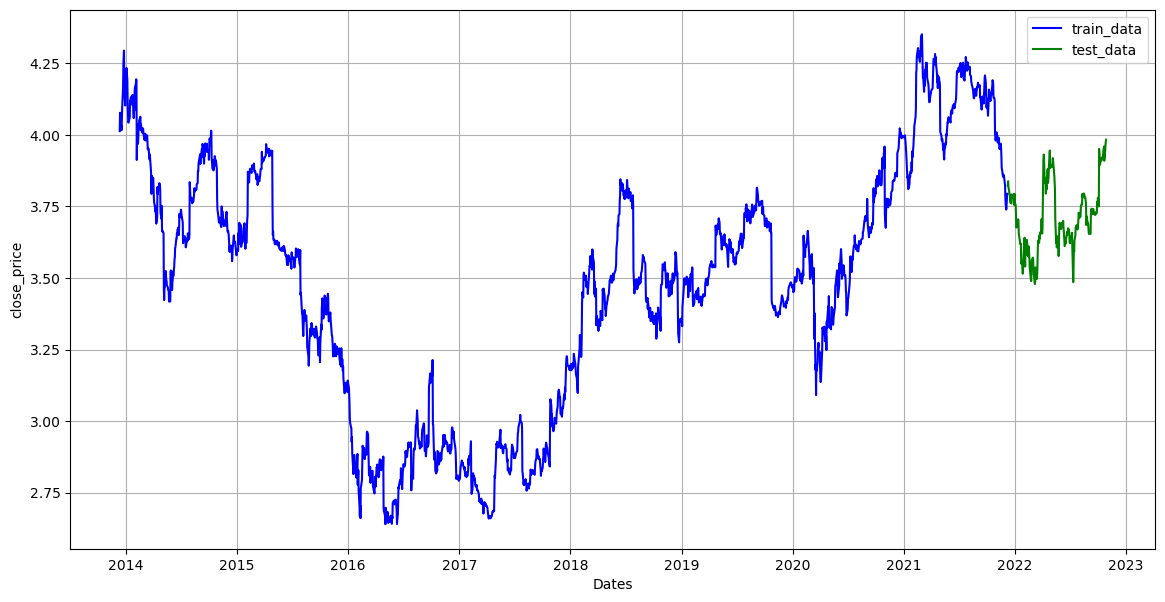

In [10]:
train_data,test_data=df_log[3:int(len(df_log)*0.9)],df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(14,7))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('close_price')
plt.plot(train_data,color='blue',label="train_data")
plt.plot(test_data,color='green',label="test_data")
plt.legend()
plt.show()

In [13]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,b
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7882.453, Time=0.97 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7881.847, Time=0.86 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7881.711, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7884.433, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7885.184, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-7884.554, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-7884.420, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-7885.404, Time=0.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-7883.947, Time=1.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-7881.994, Time=1.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-7887.385, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-7883.689, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-7886.400, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-7885.927, Time=0.99 sec
 ARIMA(1,1,1)(0,0,0

In [67]:
data['arima_pred']=model.predict(n_periods=len(data['Close']), exogenous=data['Close'])

#print('RMSE:', np.sqrt(mean_squared_error(df_valid['VWAP'], df_valid['ARIMAX_preds'])))
#print('MAE:', mean_absolute_error(df_valid['VWAP'], df_valid['ARIMAX_preds']))
df_valid[['Close', 'arima_pred']].plot();

TypeError: predict() missing 1 required positional argument: 'params'